# Dungeons and Data
## by Benjamin Knight

## Investigation Overview

> In this investigation I wanted to use a dataset of hundreds of created Dungeons and Dragons (D&D) characters to see if there were any trends in what people tended to create, if there were mechanical justifications for these choices, and if there were any unexpected results. I am an avid player of the game, and am in the process of creating a homebrew character podcast. The information I uncover here could prove very useful to creating content that caters to listeners needs.

## Dataset Overview

> The data consisted of nearly 900 unique D&D characters created on the app 5th Edition Character Creator. The attributes included the stats of the characters, as well as additional races, classes, feats, and other useful information. Six columns were removed from the analysis due to irrelevant/faulty data or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
dndf = pd.read_csv('C:\\Users\\6440\\Documents\\Udacity\\Visualization Project\\datasets\\uniquednd.tsv', sep='\t')

In [3]:
#Dropping the columns that contain faulty or irrelevant data

dndf_trim = dndf.drop(columns=['class', 'name', 'race', 'alignment', 'good', 'lawful', 'weapons', 'spells',
                               'processedSpells', 'processedWeapons', 'day'])

## Level Groupings

> One of the first things a player should think about is what level to start their character out at. Playing at different levels would offer wildly different experiences with skills available and stat scores. Seeing where player choose to begin their games at could offer insight into what sort of experience they are looking for.

>The data revealed that players were overwhelmingly more likely to create lower leveled characters for their games or campaigns, and that the higher the level, the smaller the count. The only exception was that the level 16-18 group had a lower count than the 19-20 group which may indicate a tendency for players to engage in one-off games where they begin at level 20.

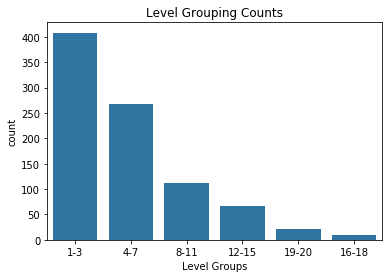

In [4]:
#Setting the level order and default color to be used
levelorder = dndf_trim['levelGroup'].value_counts().index
default_color = sb.color_palette()[0]

#creating a bar graph of each level group
lvlchart=sb.countplot(data=dndf_trim, x='levelGroup', order=levelorder, color=default_color)
lvlchart.set(xlabel='Level Groups',title='Level Grouping Counts');

## Race Selection
>Another key component of character creation is the race you'll play as. The gaceful Elves provide different skills and abilities than the hearty Dwarves or powerful Half-Orcs. Yet it seems that in a world of infinite possibilities, the race human beings want most to play as... are human beings. This is amusing, but potentially easily explainable. The rest of this graph makes sense: the core races are the most commonly played while the later introduced, rarer, and more complex races show up much less often.

>There is likely a mechanical reason for this outcome. Humans have a racial feat to add one point to every stat at first level or, alternatively, to take fewer points and gain a feat (the only race to allow for a first-level feat.) This versitility and feat-granting make Humans well suited to fit almost any situation.

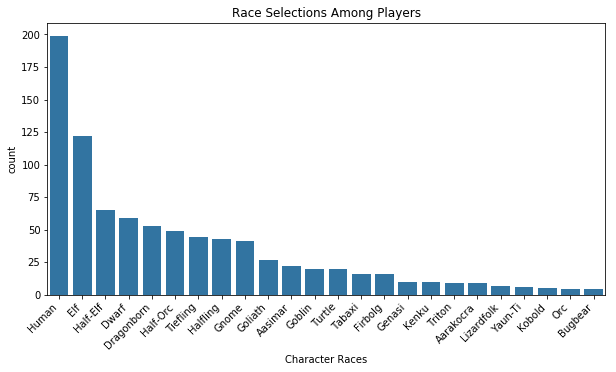

In [5]:
#Setting up the order and size of the bar chart
plt.figure(figsize=(10,5))
raceorder = dndf_trim['processedRace'].value_counts().index

#creating a bar chart to count the number count of each race of character
racechart = sb.countplot(data=dndf_trim, x='processedRace', order=raceorder, color=default_color)
racechart = racechart.set_xticklabels(racechart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Character Races')
plt.title('Race Selections Among Players');

## Stats

>Perhaps one of the most important things you can do in D&D character creation is stat allocation. Stats are how capable a character is in certain areas. The stats are: Strength (Str), Dexterity (Dex), Constitution (Con), Intelligence (Int), Wisdom (Wis), and Charisma (Cha) and I would be interested in seeing if certain stats are favored more over others.

>Dex is more commonly a higher stat than even Str even though Str does have the highest max score. Int seems to average in around 10, with a median of 13. I would have imagined Con as higher than Dex (as it's usually recommended to be the second-highest stat), I also wouldn't have expected Int to come in so low. This, though surprising on the surface, does make some sort of sense. The only class that truly utalizes Int is Wizard, while other magic classes base off Wis or Cha.

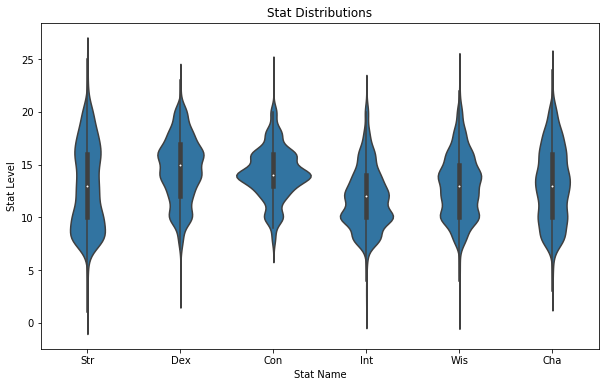

In [6]:
#Prepping stats for the violin plot
x = dndf_trim[['Str', 'Dex', 'Con', 'Int', 'Wis', 'Cha']].copy()
stats_cols = ['Str', 'Dex', 'Con', 'Int', 'Wis', 'Cha']
dndf_melt = pd.melt(dndf_trim, value_vars = stats_cols, var_name='Stat Name', value_name='Stat Level')

#Creating violin plots for each stat
plt.subplots(figsize=(10,6))
plt.title('Stat Distributions')
sb.violinplot(data=dndf_melt,x='Stat Name',y='Stat Level',color=default_color);

## Stat Correlation by Class
>Seeing the stat distribution made me wonder if how strong the corellation is between stats for a specific class. Stats can vary wildly from character to character, and one of the beautiful things about D&D is that a Fighter doesn't necessarily need a high Str score to be effective. Because of this I decided to test to see if there was any corellation using one of the most specialized and straight-forward classes: The Barbarian.

>As expected there are much clearer relationships between classes and state, though still nothing is very strong. The Barbarian has moderate positive corellations between Str and Con, Str and Dex, and Wis and Cha. A similar matrix was created 

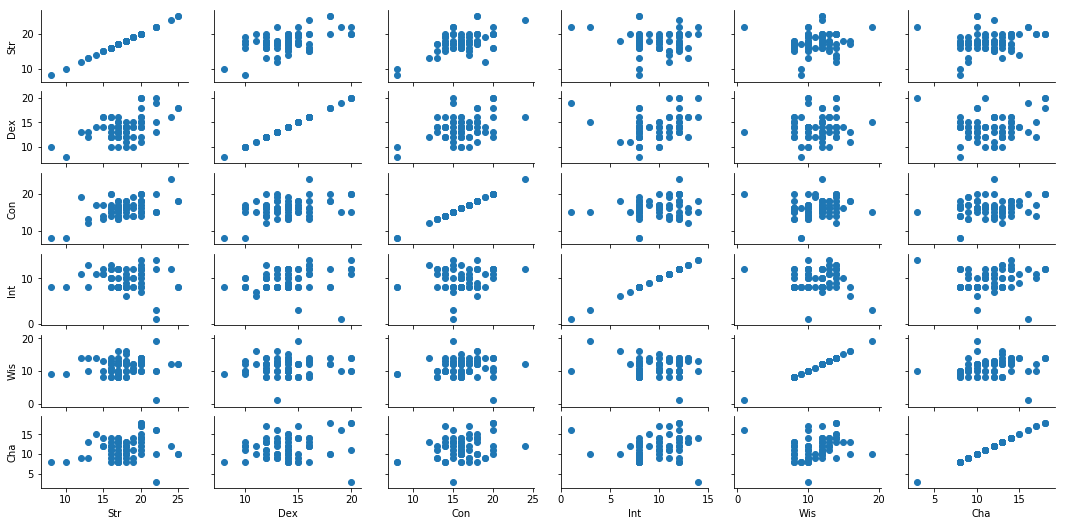

In [7]:
plt.rcParams.update({'font.size': 10})

def makePlotclass(cl=''):
    df_use = dndf_trim[dndf_trim['justClass'] == cl].copy() if cl != '' else dndf_trim
    dnd_stats = ['Str','Dex','Con','Int','Wis','Cha']
    statgrid = sb.PairGrid(data=df_use, vars=dnd_stats)
    statgrid.fig.set_size_inches(15,7)
    statgrid.map(plt.scatter)
    
    
makePlotclass('Barbarian')

## Class and Race Combinations

>Coming off of comparing class stats we'll now be looking at what class and race combinations appear the most in this dataset, and therefore were the most common choices overall and for each race. This yielded some very interesting results. There was a very clear relationship between class and race selections that were far more apparent than the relationship between stats and either of the two. By a far cry Human Fighters are the most common choice for character creation. This links back to the level groupings. It's likely a lot of new players are creating characters in the level 1-3 range, and a Human Fighter is a much easier class to play as for beginners. We can see again here that Humans sweep most classes. 

>All this tells us that for the most part players try to best match the stat strengths of their races to what their classes call for. Characters with high Str racial feats are more likely to be fighters or barbarians, and characters like Tabaxi who favor Dex and speed are usually Monks or Rogues.

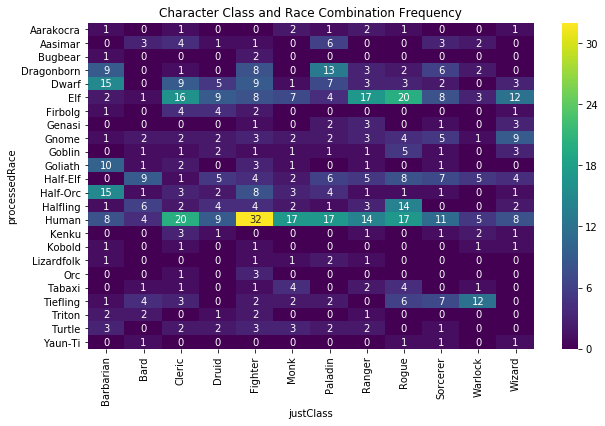

In [8]:
counts = dndf_trim.groupby(['justClass','processedRace']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(index='processedRace', columns='justClass', values = 'count').fillna(0)
counts_trim = counts[['Barbarian','Bard','Cleric','Druid','Fighter','Monk','Paladin','Ranger','Rogue','Sorcerer','Warlock','Wizard']]
plt.subplots(figsize=(10,6))
plt.title('Character Class and Race Combination Frequency')
sb.heatmap(counts_trim, cmap = 'viridis', annot=True, annot_kws={"size": 10});